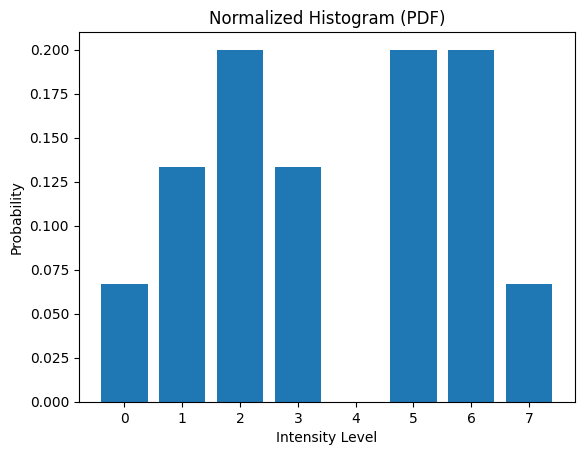

Input Intensities (rk): [0 1 2 3 4 5 6 7]
Input Histogram (hk): [2 4 6 4 6 4 2 2]
Mapped Intensities (Sk): [0 1 2 3 5 6 6 7]
Output Histogram (h'k): [2 4 6 4 0 6 6 2]
PDF (Pk): [0.06666667 0.13333333 0.2        0.13333333 0.         0.2
 0.2        0.06666667]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given input intensity levels and their frequency
rk = np.array([0, 1, 2, 3, 4, 5, 6, 7])
hk = np.array([2, 4, 6, 4, 6, 4, 2, 2])  # Given frequencies

# Compute total pixels
total_pixels = np.sum(hk)

# Compute the cumulative sum
Sk = np.cumsum(hk)

# Normalize cumulative sum to map intensity levels
L = len(rk)  # Number of intensity levels
Sk = (Sk - Sk.min()) * (L - 1) / (total_pixels - 1)  # Mapping formula

# Round to nearest integer intensity
Sk = np.round(Sk).astype(int)

# Compute new histogram
output_hk = np.zeros_like(hk)
for i in range(len(rk)):
    output_hk[Sk[i]] += hk[i]

# Compute PDF (Probability Density Function)
Pk = output_hk / total_pixels

# Plot the histogram
plt.bar(rk, Pk)
plt.xlabel("Intensity Level")
plt.ylabel("Probability")
plt.title("Normalized Histogram (PDF)")
plt.show()

# Print results
print("Input Intensities (rk):", rk)
print("Input Histogram (hk):", hk)
print("Mapped Intensities (Sk):", Sk)
print("Output Histogram (h'k):", output_hk)
print("PDF (Pk):", Pk)


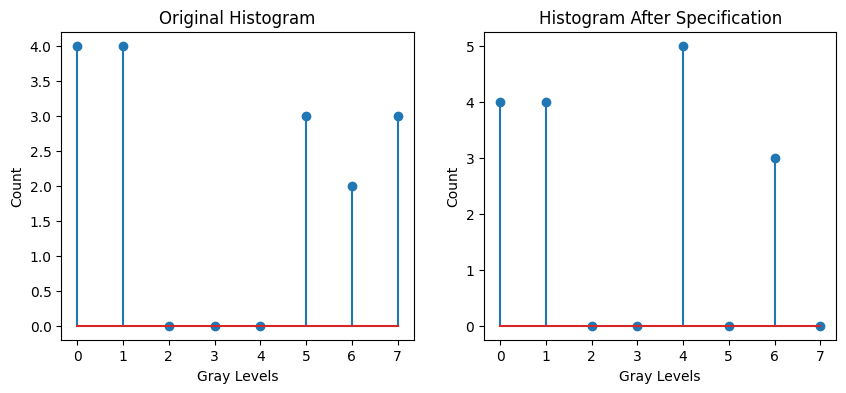

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# === Step 1: Define the Original Histogram (from the given histogram) ===
original_hist = np.array([4, 4, 0, 0, 0, 3, 2, 3])  # Given in part (a)
original_pdf = original_hist / np.sum(original_hist)  # Normalize to PDF
original_cdf = np.cumsum(original_pdf)  # Compute CDF

# === Step 2: Define the Target Histogram (from the given pdf) ===
target_pdf = np.array([0.15, 0.3, 0.15, 0, 0.1, 0, 0.4, 0])  # Given in part (d)
target_cdf = np.cumsum(target_pdf)  # Compute CDF

# === Step 3: Create the Mapping Using Nearest Neighbor Matching ===
mapping = np.zeros(8, dtype=np.uint8)  # Mapping from original to target
for i in range(8):  # For each gray level in original
    closest_idx = np.argmin(np.abs(target_cdf - original_cdf[i]))  # Find nearest match
    mapping[i] = closest_idx  # Assign new mapped value

# === Step 4: Generate the New Histogram ===
new_hist = np.zeros(8, dtype=np.int32)
for i in range(8):
    new_hist[mapping[i]] += original_hist[i]

# === Step 5: Plot the Original and Mapped Histograms ===
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.stem(range(8), original_hist)
plt.title("Original Histogram")
plt.xlabel("Gray Levels")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.stem(range(8), new_hist)
plt.title("Histogram After Specification")
plt.xlabel("Gray Levels")
plt.ylabel("Count")

plt.show()


In [ ]:
import numpy as np
import cv2

# Original grayscale image
image = np.array([
    [15, 25, 35, 45, 55],
    [25, 35, 45, 55, 15],
    [5, 240, 190, 110, 15],
    [25, 35, 55, 65, 25],
    [5, 240, 190, 110, 15],
    [25, 35, 55, 65, 25]
], dtype=np.uint8)

# Structuring element (Kernel)
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
], dtype=np.uint8)

# Perform dilation using OpenCV
dilated_image = cv2.dilate(image, kernel, iterations=1)
dilated_image


array([[ 25,  35,  45,  55,  55],
       [ 35, 240, 190, 110,  55],
       [240, 240, 240, 190, 110],
       [ 35, 240, 190, 110,  65],
       [240, 240, 240, 190, 110],
       [ 35, 240, 190, 110,  65]], dtype=uint8)

In [ ]:
import cv2
import numpy as np

# Original grayscale image as a NumPy array
image1 = np.array([
    [10, 20, 30, 40, 50],
    [20, 30, 40, 50, 10],
    [0, 255, 200, 100, 10],
    [20, 30, 50, 60, 20],
    [0, 255, 200, 100, 10],
    [20, 30, 50, 60, 20]
], dtype=np.uint8)
image = np.array([
    [15, 25, 35, 45, 55],
    [25, 35, 45, 55, 15],
    [5, 240, 190, 110, 15],
    [25, 35, 55, 65, 25],
    [5, 240, 190, 110, 15],
    [25, 35, 55, 65, 25]
], dtype=np.uint8)

# Structuring element (3x3)
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
], dtype=np.uint8)

# Use OpenCV to apply erosion
eroded = cv2.erode(image, kernel, iterations=1)
eroded1 = cv2.erode(image, kernel, iterations=1)

# Use OpenCV to apply dilation
dilated = cv2.dilate(image, kernel, iterations=1)

# Print results
print("Original Image:\n", image)
print("\nEroded Image:\n", eroded)
print("\nEroded Image1:\n", eroded1)

print("\nDilated Image:\n", dilated)


Original Image:
 [[ 15  25  35  45  55]
 [ 25  35  45  55  15]
 [  5 240 190 110  15]
 [ 25  35  55  65  25]
 [  5 240 190 110  15]
 [ 25  35  55  65  25]]

Eroded Image:
 [[15 15 25 35 15]
 [ 5 25 35 15 15]
 [ 5  5 45 15 15]
 [ 5 25 35 25 15]
 [ 5  5 55 15 15]
 [ 5 25 35 25 15]]

Eroded Image1:
 [[15 15 25 35 15]
 [ 5 25 35 15 15]
 [ 5  5 45 15 15]
 [ 5 25 35 25 15]
 [ 5  5 55 15 15]
 [ 5 25 35 25 15]]

Dilated Image:
 [[ 25  35  45  55  55]
 [ 35 240 190 110  55]
 [240 240 240 190 110]
 [ 35 240 190 110  65]
 [240 240 240 190 110]
 [ 35 240 190 110  65]]


In [ ]:
import numpy as np
from scipy.ndimage import binary_hit_or_miss

# Binary image from previous step (A)
A = np.array([
    [0, 1, 1, 1, 0, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 0, 0, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 0, 1, 1, 1],
    [0, 0, 1, 1, 1, 0]
])

# Structuring element B
B = np.array([
    [0, 1, 1],
    [0, 1, 0],
    [0, 1, 0]
])

# Compute complement of A (X_0 = A^c)
X_k = 1 - A

# Function to perform morphological hit-or-miss operation (erosion with B)
def morphological_operation(X, B):
    return binary_hit_or_miss(X, structure1=B).astype(int)

# Iterative process
iterations = []
while True:
    X_next = morphological_operation(X_k, B) | A  # (X_k ⊖ B) ∪ A
    iterations.append(X_next.copy())

    if np.array_equal(X_next, X_k):  # Stop condition
        break

    X_k = X_next.copy()

iterations


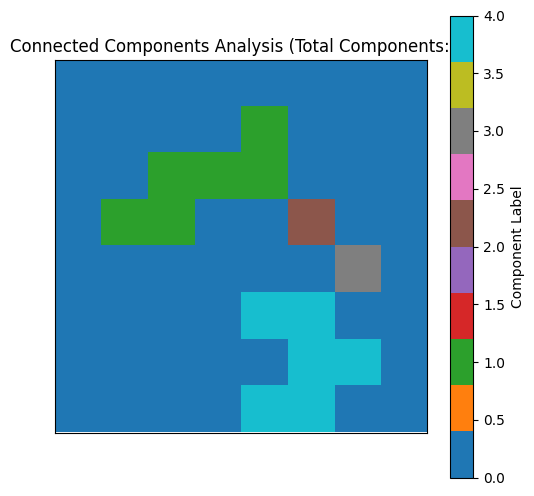

4

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the given binary matrix
binary_matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 0, 0]
], dtype=np.uint8)

# Perform connected component analysis
num_labels, labels = cv2.connectedComponents(binary_matrix, connectivity=4)

# Plot the results
plt.figure(figsize=(6,6))
plt.imshow(labels, cmap="tab10", interpolation="nearest")
plt.colorbar(label="Component Label")
plt.title(f"Connected Components Analysis (Total Components: {num_labels-1})")
plt.xticks([])
plt.yticks([])
plt.show()

# Output the number of components
num_labels - 1  # Excluding background (label 0)


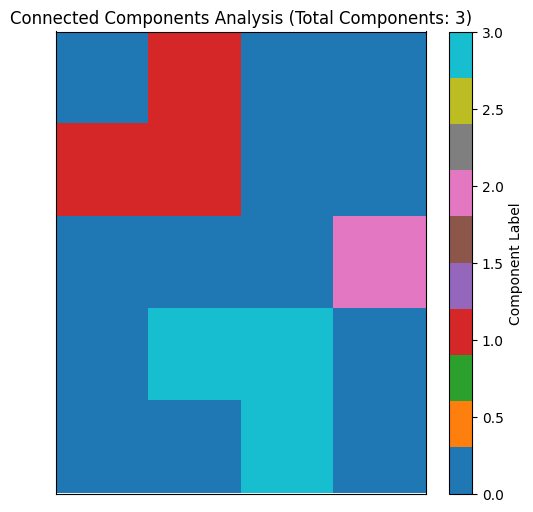

3

In [ ]:
# Define the new binary matrix from the image
binary_matrix_new = np.array([
    [0, 1, 0, 0],
    [1, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 0, 1, 0]
], dtype=np.uint8)
binary_matrix_new2 = np.array([
    [0, 0, 0, 1],
    [1, 1, 0, 0],
    [0, 0, 1, 1],
    [0, 1, 1, 0],
    [1, 0, 0, 0]
], dtype=np.uint8)

# Perform connected component analysis
num_labels, labels = cv2.connectedComponents(binary_matrix_new, connectivity=4)

# Plot the results
plt.figure(figsize=(6,6))
plt.imshow(labels, cmap="tab10", interpolation="nearest")
plt.colorbar(label="Component Label")
plt.title(f"Connected Components Analysis (Total Components: {num_labels-1})")
plt.xticks([])
plt.yticks([])
plt.show()

# Output the number of components
num_labels - 1  # Excluding background (label 0)



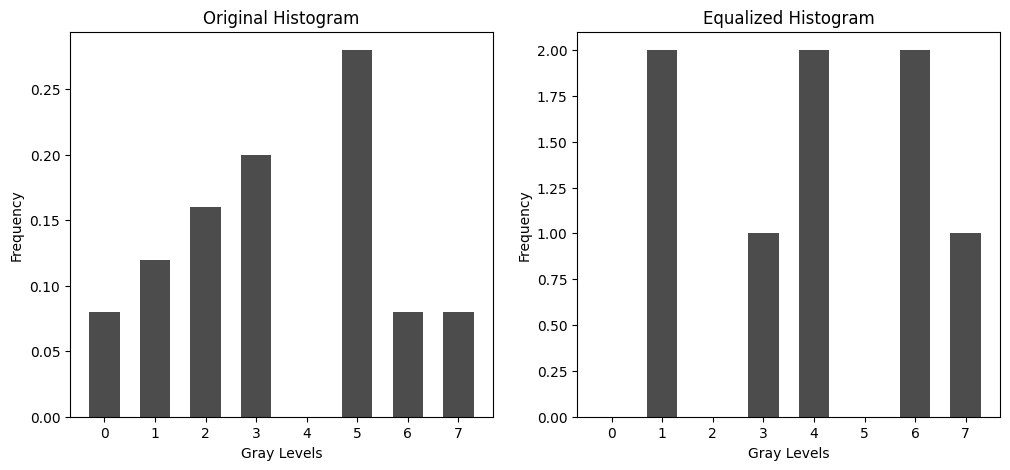

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given gray levels
gray_levels = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Given CDF values (from image)
cdf_values = np.array([0.08, 0.2, 0.36, 0.56, 0.56, 0.84, 0.92, 1])

# Step 1: Convert CDF to histogram (by taking differences)
hist_values = np.diff(np.insert(cdf_values, 0, 0))

# Step 2: Normalize CDF to match the intensity range (0-7)
equalized_values = np.round(cdf_values * 7).astype(int)

# Step 3: Construct the equalized histogram
equalized_hist = np.zeros(8)
for new_gray in equalized_values:
    equalized_hist[new_gray] += 1

# Plot original histogram
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.bar(gray_levels, hist_values, color='black', alpha=0.7, width=0.6)
plt.xlabel("Gray Levels")
plt.ylabel("Frequency")
plt.title("Original Histogram")

# Plot equalized histogram
plt.subplot(1, 2, 2)
plt.bar(gray_levels, equalized_hist, color='black', alpha=0.7, width=0.6)
plt.xlabel("Gray Levels")
plt.ylabel("Frequency")
plt.title("Equalized Histogram")

plt.show()


In [ ]:
import cv2
import numpy as np

# Binary image from part (a)
binary_img = np.array([
    [1, 0, 0, 1, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 0, 1],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0]
], dtype=np.uint8)

# Create a copy to store the flood-filled result
flood_filled = binary_img.copy()

# Create mask for floodFill (needs to be 2 pixels larger than input)
h, w = binary_img.shape
mask = np.zeros((h+2, w+2), np.uint8)

# Select a seed point (manually chosen from the image)
seed_point = (2, 2)  # Inside the object

# Apply flood fill (filling holes)
cv2.floodFill(flood_filled, mask, seed_point, 1)

# Combine the filled region with the original binary image
filled_image = binary_img | flood_filled

print("Filled Binary Image:\n", filled_image)


Filled Binary Image:
 [[1 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


Gradient Magnitude Image:
 [[ 42.42640687 242.07436874 331.36083052]
 [242.07436874 636.39610307 488.46698967]
 [331.36083052 488.46698967 466.69047558]]
Binary Image:
 [[0 0 0]
 [0 1 0]
 [0 0 0]]


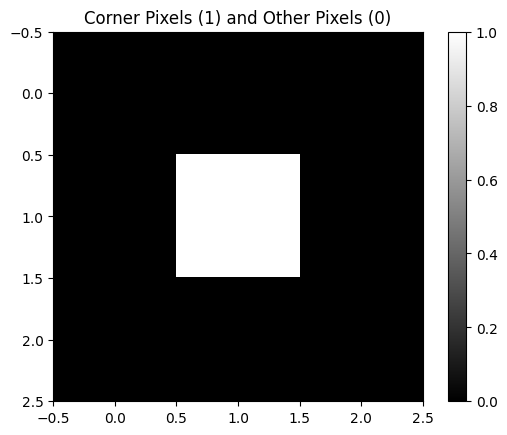

Binary Image:
 [[0 0 0]
 [0 1 0]
 [0 0 0]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given Sobel outputs (horizontal Gx and vertical Gy)
Gx = np.array([
    [-30, -190, -330],
    [-150, -450, -450],
    [30, 190, 330]
])

Gy = np.array([
    [-30, -150, 30],
    [-190, -450, 190],
    [-330, -450, 330]
])

# Step 1: Compute Gradient Magnitude Image
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)
print("Gradient Magnitude Image:\n", gradient_magnitude)

# Given cluster centers
CA = 610  # Cluster A (Corner Pixels)
CB = 550  # Cluster B (Other Pixels)

# Step 2: Assign pixels to nearest cluster
binary_image = np.where(np.abs(gradient_magnitude - CA) < np.abs(gradient_magnitude - CB), 1, 0)
print("Binary Image:\n", binary_image)
# Step 3: Display Binary Image
plt.imshow(binary_image, cmap='gray', interpolation='nearest')
plt.title("Corner Pixels (1) and Other Pixels (0)")
plt.colorbar()
plt.show()

# Print the Binary Image
print("Binary Image:\n", binary_image)


[[1 0 0 1 0]
 [0 0 1 1 0]
 [0 1 0 0 1]
 [0 1 0 1 1]
 [0 0 1 1 0]]
[[0 1 1 0 1]
 [1 1 0 0 1]
 [1 0 1 1 0]
 [1 0 1 0 0]
 [1 1 0 0 0]]


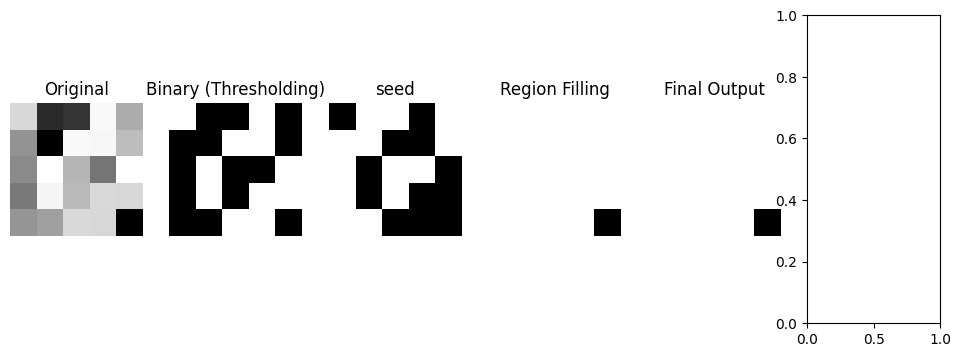

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Given 5x5 grayscale image
gray_image = np.array([
    [191, 110, 115, 207, 171],
    [159, 90,  207, 206, 179],
    [155, 210, 175, 145, 210],
    [147, 205, 177, 192, 191],
    [160, 165, 192, 191, 90]
], dtype=np.uint8)

### STEP (A): Thresholding ###
# Compute threshold T
max_val = np.max(gray_image)  # 210
min_val = np.min(gray_image)  # 90
k = 0.3
T = max_val - k * min_val  # 183

# Convert to binary image
binary_image = (gray_image >= T).astype(np.uint8)
print(binary_image)
### STEP (B): Region Filling ###
# Create a copy of the binary image for filling
filled_image = binary_image.copy()
h, w = binary_image.shape

# Structuring element (3x3 square)
kernel = np.ones((3, 3), np.uint8)

# Initialize the seed matrix (a point inside the object)
seed = np.zeros_like(binary_image)
seed[2, 2] = 1  # Assume (2,2) is inside the main object

# Perform morphological region filling iteratively
while True:
    new_seed = cv2.dilate(seed, kernel, iterations=1)
    new_seed = new_seed & (~binary_image)  # Restrict within object boundary
    if np.array_equal(new_seed, seed):
        break
    seed = new_seed
print(seed)
# Merge filled region with original binary image
filled_image = binary_image | seed

### STEP (C): Removing Small Objects ###
# Apply morphological opening (erosion followed by dilation)
filtered_image = cv2.morphologyEx(filled_image, cv2.MORPH_OPEN, kernel)

### DISPLAY RESULTS ###
fig, axes = plt.subplots(1, 6, figsize=(12, 4))
titles = ['Original', 'Binary (Thresholding)', 'seed', 'Region Filling', 'Final Output']
images = [gray_image, binary_image, seed,  filled_image, filtered_image]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray', interpolation='nearest')
    ax.set_title(title)
    ax.axis('off')

plt.show()


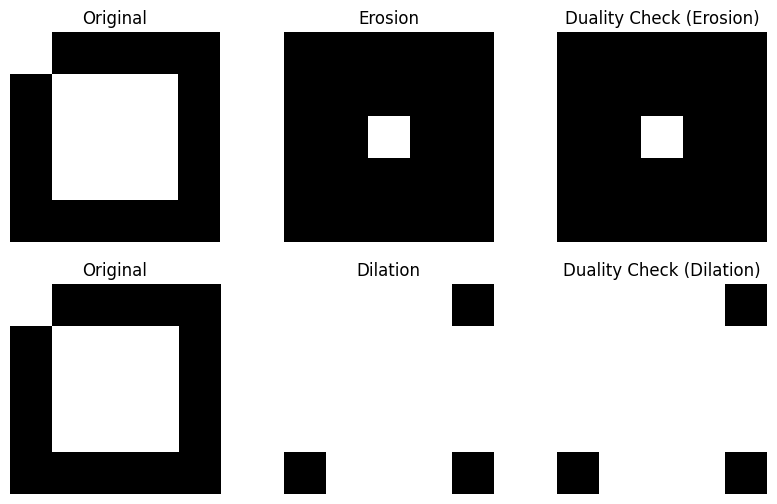

Erosion Duality Verified: True
Dilation Duality Verified: True
Eroded Image:
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Duality Check (Erosion):
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Dilated Image:
 [[1 1 1 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 1 1 1 0]]
Duality Check (Dilation):
 [[1 1 1 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 1 1 1 0]]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define binary image
binary_image = np.array([
    [1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
], dtype=np.uint8)

# Define structuring element (kernel)
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
], dtype=np.uint8)

# Complement of the original binary image
binary_complement = 1 - binary_image

# Apply Erosion
eroded = cv2.erode(binary_image, kernel, iterations=1)

# Apply Dilation on complement
dilated_complement = cv2.dilate(binary_complement, kernel, iterations=1)

# Compute complement of dilated_complement
dual_erosion = 1 - dilated_complement  # Should match original erosion

# Apply Dilation
dilated = cv2.dilate(binary_image, kernel, iterations=1)

# Apply Erosion on complement
eroded_complement = cv2.erode(binary_complement, kernel, iterations=1)

# Compute complement of eroded_complement
dual_dilation = 1 - eroded_complement  # Should match original dilation

# Verify if they are equal
erosion_duality_verified = np.array_equal(eroded, dual_erosion)
dilation_duality_verified = np.array_equal(dilated, dual_dilation)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
titles = ['Original', 'Erosion', 'Duality Check (Erosion)',
          'Original', 'Dilation', 'Duality Check (Dilation)']
images = [binary_image, eroded, dual_erosion, binary_image, dilated, dual_dilation]

for ax, img, title in zip(axes.flatten(), images, titles):
    ax.imshow(img, cmap='gray', interpolation='nearest')
    ax.set_title(title)
    ax.axis('off')

plt.show()

# Print verification results
print("Erosion Duality Verified:", erosion_duality_verified)
print("Dilation Duality Verified:", dilation_duality_verified)

# Print Matrices
print("Eroded Image:\n", eroded)
print("Duality Check (Erosion):\n", dual_erosion)
print("Dilated Image:\n", dilated)
print("Duality Check (Dilation):\n", dual_dilation)


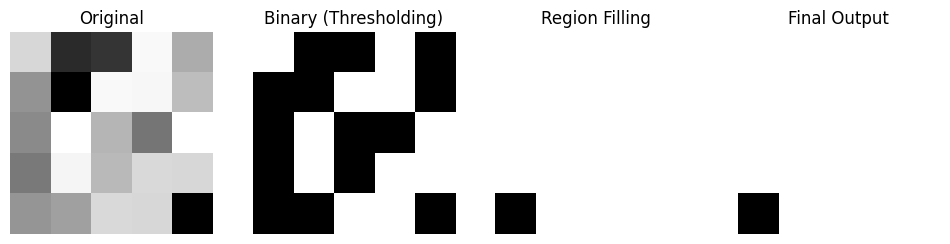

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Given 5x5 grayscale image
gray_image = np.array([
    [191, 110, 115, 207, 171],
    [159, 90,  207, 206, 179],
    [155, 210, 175, 145, 210],
    [147, 205, 177, 192, 191],
    [160, 165, 192, 191, 90]
], dtype=np.uint8)

### STEP (A): Thresholding ###
# Compute threshold T
max_val = np.max(gray_image)  # 210
min_val = np.min(gray_image)  # 90
k = 0.3
T = max_val - k * min_val  # 183

# Convert to binary image
binary_image = (gray_image >= T).astype(np.uint8)
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
], dtype=np.uint8)


### STEP (C): Removing Small Objects ###
# Apply morphological opening (erosion followed by dilation)
filtered_image = cv2.dilate(binary_image, kernel, iterations=1)

### DISPLAY RESULTS ###
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
titles = ['Original', 'Binary (Thresholding)', 'Region Filling', 'Final Output']
images = [gray_image, binary_image, filtered_image, filtered_image]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray', interpolation='nearest')
    ax.set_title(title)
    ax.axis('off')

plt.show()
